<a href="https://colab.research.google.com/github/queziamirandaDev/Python-para-DataScience/blob/main/13_Regress%C3%A3o_Linear_V2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão de negocio

uma empresa esta interesada em verificar se a remuneração (salario) dos funcionarios esta de acordo com as politicas da empresa

para isso uma amostra de 46 colaboradores foi disponibilisada

* Pergunta de negocio: o salaraio muda de acordo com o ano de educação superior
* Se muda, é possivel prever o salario apartir de um modelo?

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
df_func = pd.read_csv('/content/base_funcionarios_v2.csv', delimiter=';', index_col='id')

df_func.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [3]:
df_func.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


In [4]:
df_func.describe().round(2)

,Salario,Anos_Educ_Superior,Tempo_Empresa
count,46.00,46.00,46.00
mean,6969.80,5.07,10.33
std,1924.87,2.84,7.60
min,4139.50,0.00,0.00
25%,5818.35,4.00,5.25
50%,6394.75,5.00,8.50
75%,7972.40,6.00,17.25
max,12118.10,12.00,27.00


In [5]:
df_func.isna().sum()

,0
Salario,0
Anos_Educ_Superior,0
Tempo_Empresa,0


<Axes: xlabel='Tempo_Empresa', ylabel='Salario'>

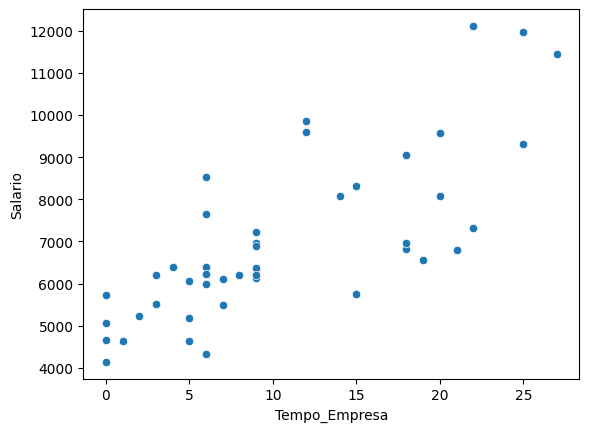

In [6]:
#grafico de dispersão
# eixo x explicativa
# eixo y resposta ou alvo (dependente)

sns.scatterplot(x=df_func['Tempo_Empresa'], y=df_func['Salario'])

In [7]:
#Correlação linear de pearson

df_func.corr()

,Salario,Anos_Educ_Superior,Tempo_Empresa
Salario,1.000000,0.776992,0.765173
Anos_Educ_Superior,0.776992,1.000000,0.607486
Tempo_Empresa,0.765173,0.607486,1.000000


<Axes: >

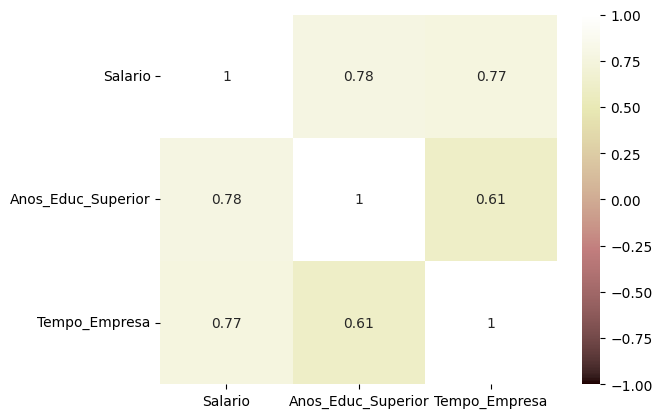

In [11]:
sns.heatmap(
    df_func.corr(),
    cmap='pink',
    vmin= -1,vmax= 1,
    annot=True
)

In [12]:
# ajuste do modelo

#variavel alvo

y = df_func['Salario']


#variavel explicativa
df_func['intercepto'] = 1
x=df_func[['intercepto','Anos_Educ_Superior','Tempo_Empresa']]

In [13]:
modelo = sm.OLS(y,x)

resultado = modelo.fit()

In [14]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           2.66e-13
Time:                        00:09:09   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309